In [3]:
from pathlib import Path
import pydicom    #!pip install pydicom
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dicom_file = pydicom.read_file("ID_0000_AGE_0060_CONTRAST_1_CT.dcm")

In [5]:
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

In [6]:
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

In [7]:
dicom_file.Rows

512

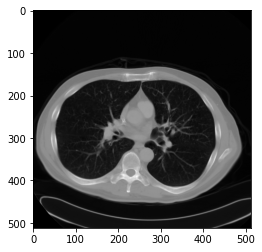

In [8]:
ct = dicom_file.pixel_array
plt.figure()
plt.imshow(ct, cmap="gray")

In [9]:
path_to_head_mri = Path("SE000001/")

In [10]:
all_files = list(path_to_head_mri.glob("*"))

In [11]:
all_files

[WindowsPath('SE000001/MR000000'),
 WindowsPath('SE000001/MR000001'),
 WindowsPath('SE000001/MR000002'),
 WindowsPath('SE000001/MR000003'),
 WindowsPath('SE000001/MR000004'),
 WindowsPath('SE000001/MR000005'),
 WindowsPath('SE000001/MR000006'),
 WindowsPath('SE000001/MR000007'),
 WindowsPath('SE000001/MR000008'),
 WindowsPath('SE000001/MR000009'),
 WindowsPath('SE000001/MR000010'),
 WindowsPath('SE000001/MR000011'),
 WindowsPath('SE000001/MR000012'),
 WindowsPath('SE000001/MR000013'),
 WindowsPath('SE000001/MR000014'),
 WindowsPath('SE000001/MR000015'),
 WindowsPath('SE000001/MR000016'),
 WindowsPath('SE000001/MR000017'),
 WindowsPath('SE000001/MR000018'),
 WindowsPath('SE000001/MR000019'),
 WindowsPath('SE000001/MR000020'),
 WindowsPath('SE000001/MR000021'),
 WindowsPath('SE000001/MR000022'),
 WindowsPath('SE000001/MR000023'),
 WindowsPath('SE000001/MR000024'),
 WindowsPath('SE000001/MR000025'),
 WindowsPath('SE000001/MR000026')]

In [12]:
mri_data = []

for path in all_files:
    data = pydicom.read_file(path)
    mri_data.append(data)

In [13]:
for slice in mri_data[:20]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439


In [14]:
mri_data_sorted = sorted(mri_data, key=lambda slice: slice.SliceLocation)

for slice in mri_data[:20]:
    print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714
29.9999952815023
35.9999959546749
41.9999963629367
47.9999970362677
53.9999958207213
59.9999962290673
65.9999961939969
71.9999961590453
77.9999962275740
83.9999967682912
89.9999955528687
95.9999960937442
101.999994745866
107.999995419197
113.999995959439


In [15]:
full_volume = []

for slice in mri_data_sorted:
    full_volume.append(slice.pixel_array)

In [16]:
np.array(full_volume).shape

(27, 256, 256)

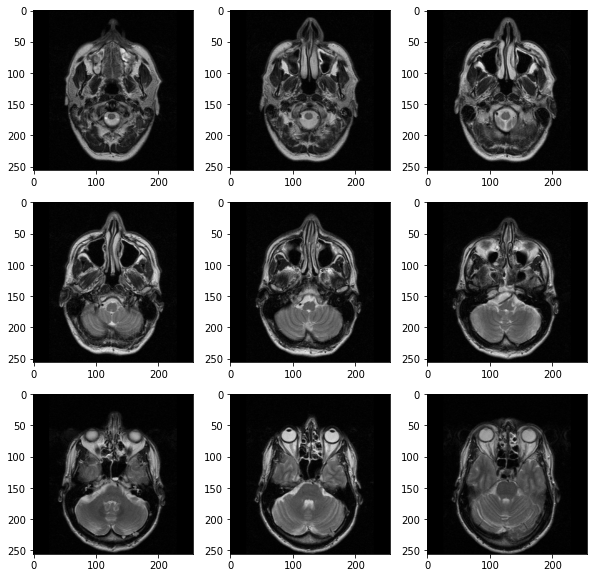

In [17]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(full_volume[slice_counter], cmap="gray")
        slice_counter+=1

In [18]:
import SimpleITK as sitk

In [19]:
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [20]:
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

('SE000001\\MR000000',
 'SE000001\\MR000001',
 'SE000001\\MR000002',
 'SE000001\\MR000003',
 'SE000001\\MR000004',
 'SE000001\\MR000005',
 'SE000001\\MR000006',
 'SE000001\\MR000007',
 'SE000001\\MR000008',
 'SE000001\\MR000009',
 'SE000001\\MR000010',
 'SE000001\\MR000011',
 'SE000001\\MR000012',
 'SE000001\\MR000013',
 'SE000001\\MR000014',
 'SE000001\\MR000015',
 'SE000001\\MR000016',
 'SE000001\\MR000017',
 'SE000001\\MR000018',
 'SE000001\\MR000019',
 'SE000001\\MR000020',
 'SE000001\\MR000021',
 'SE000001\\MR000022',
 'SE000001\\MR000023',
 'SE000001\\MR000024',
 'SE000001\\MR000025',
 'SE000001\\MR000026')

In [21]:
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [22]:
image_data = series_reader.Execute()

In [23]:
head_mri = sitk.GetArrayFromImage(image_data)

In [24]:
head_mri.shape

(27, 256, 256)

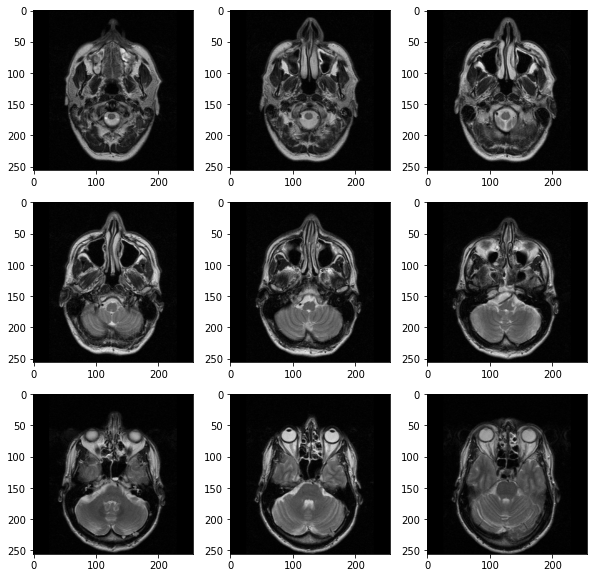

In [25]:
fig, axis = plt.subplots(3, 3, figsize=(10, 10))

slice_counter = 0
for i in range(3):
    for j in range(3):
        axis[i][j].imshow(head_mri[slice_counter], cmap="gray")
        slice_counter+=1